In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("setup ok")

setup ok


In [2]:
df=pd.read_csv("../Data/Task 3 and 4_Loan_Data.csv",index_col=0)
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,,,,,,,
8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


<Axes: xlabel='fico_score', ylabel='Density'>

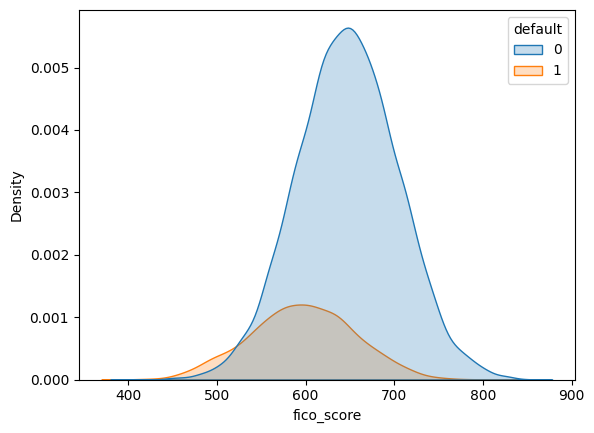

In [3]:
sns.kdeplot(data=df, x="fico_score", hue="default", fill=True)

In [4]:
def log_likehood_bin(data,bins):
    if bins[0] != 300: bins = [300] + bins
    if bins[-1] != 850: bins = bins + [850]
    X=data[['fico_score','default']].copy()
    X['fico_score_binned'] = pd.cut(X['fico_score'], bins=bins, labels=False,duplicates='drop')
    bin_X = X.groupby('fico_score_binned')['default'].value_counts()
    idx=bin_X.index
    last=-1
    bin_idx=[]
    for (a,b) in idx:
        if a != last:
            bin_idx.append(a)
        last = a
    log_likelihood = 0
    for i in bin_idx:
        #verifier le cas k=0
        if (i,1) not in idx:
            bin_X.loc[(i,1)] = 0
        k=bin_X[i][1]
        n=bin_X[i].sum()
        if n>0 and k>0 and k<n:
            p=k/n
            log_likelihood += k * np.log(p) + (n - k) * np.log(1 - p)
        else:
            return -np.inf
    return log_likelihood

In [5]:
#Benchwork
bins = [500, 546, 584, 610, 647, 676, 733]
log_likelihood = log_likehood_bin(df, bins)
print("Log-Likelihood for bins", bins, ":", log_likelihood)

Log-Likelihood for bins [500, 546, 584, 610, 647, 676, 733] : -4239.260695882469


In [6]:
#Test with randoms bins to see if we can do better
import random
best_ll = log_likelihood
best_bins = bins
for _ in range(20000):
    random_bins = sorted(random.sample(range(301, 850), 7))
    ll = log_likehood_bin(df, random_bins)
    if ll > best_ll:
        best_ll = ll
        best_bins = random_bins
print("Best Log-Likelihood found:", best_ll)
print("With bins:", best_bins)

Best Log-Likelihood found: -4239.260695882469
With bins: [500, 546, 584, 610, 647, 676, 733]
